# Feature extraction and embbeding
_María Camila Vásquez Correa_

### Necessary packages

In [2]:
import numpy as np
import itertools
import pandas as pd
from bhtsne import tsne
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import decomposition

### Data loading
And normalization!

In [3]:
iris = load_iris().data.T
target = load_iris().target
N = 4
n = 150
# Normalization
for i in range(N):
    iris[i] = iris[i]/np.max(iris[i])
iris = iris.T

In [6]:
# Real data loading
credit = pd.read_csv('data/creditcard.csv')
credit = credit.drop('Time', axis = 1)
credit = credit.drop('Class', axis = 1)

In [7]:
N2 = 29
n_samples2 = 284807

In [8]:
for i in credit.columns:
    credit[i] = credit[i]/np.max(credit[i])

## Embbeding
The algorithm to be used is the Barnes-Hut T-sne, with 2 dimensions for visualization

In [10]:
# To preserve the results of the embbeding
random_seed = 42
rng = np.random.RandomState() 
np.random.seed(random_seed)

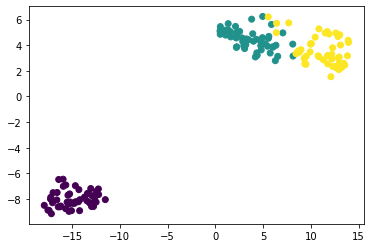

In [11]:
Y = tsne(iris)
plt.scatter(Y[:, 0], Y[:, 1], c=target)
plt.show()

In [ ]:
H = tsne(credit.values)

In [44]:
# Save the results for later visualization
pd.DataFrame(H).to_csv('credit_embbeding.csv', index = False)

## Feature extraction
The features for the toy dataset include proportions between the sepal and the petal (length and width) and they increment the dimension by 4 (double)

In [9]:
iris1 = pd.DataFrame(iris)
iris1['Proportion1'] = iris1[0]/iris1[1]
iris1['Proportion2'] = iris1[1]/iris1[2]
iris1['Proportion3'] = iris1[2]/iris1[3]
iris1['Proportion4'] = iris1[0]/iris1[3]

In [10]:
# Save the results for later learning
iris1.to_csv('high_dimension_iris.csv', index = False)

For the real dataset, we are going to perform a PCA to extract the principal characteristics in the data

In [14]:
pca = decomposition.PCA(n_components=8)
pca.fit(credit.values)
credit_mid = pca.transform(credit.values)

In [18]:
# Save the results for later learning
pd.DataFrame(credit_mid).to_csv('credit_pca.csv', index = False)

In [19]:
credit_mid.shape

(284807, 8)

In [20]:
credit.values.shape

(284807, 30)